Import the libraries


In [0]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the stock symbols/tickers in the portfolio

In [0]:
# FAANG
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

Assign weights to the stocks (must equal 1 or 100%)

In [0]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

Get the stock/portflio starting date

In [0]:
stockStartDate = '2013-01-01'

Get the stock/portfolio ending date (today)

In [8]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-04-25'

Create a dataframe to store the adjusted close price of the stocks

In [0]:
df = pd.DataFrame()

# Store the adjusted close price of the stock into the dataframe
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

Show the dataframe

In [11]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-04-20,178.240005,2393.610107,276.929993,437.489990,1266.609985
2020-04-21,170.800003,2328.120117,268.369995,433.829987,1216.339966
2020-04-22,182.279999,2363.489990,276.100006,421.420013,1263.209961


Visualize the stock/portfolio

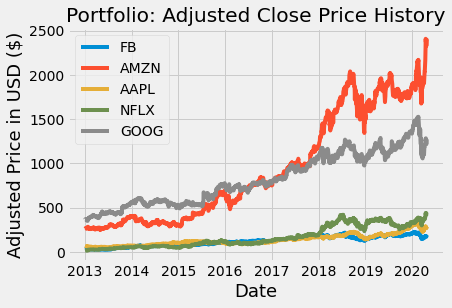

In [17]:
title = 'Portfolio: Adjusted Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values: # for all of the columns in the dataframe
  plt.plot(my_stocks[c], label=c) # plot each value

plt.title(title) # title of graph
plt.xlabel('Date', fontsize=18) # x axis label and font size
plt.ylabel('Adjusted Price in USD ($)', fontsize=18) # y axis label and font size
plt.legend(my_stocks.columns.values, loc='upper left') # location of stock symbols
plt.show()

Show the daily simple return

In [14]:
returns = df.pct_change() # returns = new price/old price -1
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-04-20,-0.005579,0.007836,-0.020757,0.034353,-0.012967
2020-04-21,-0.041741,-0.027360,-0.030910,-0.008366,-0.039689
2020-04-22,0.067213,0.015192,0.028804,-0.028606,0.038534


Create and show annualized covariance matrix

In [15]:
cov_matrix_annual = returns.cov() * 252  # directional relationship bewtween 2 asset prices
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115589,0.051369,0.040186,0.053911,0.047735
AMZN,0.051369,0.091325,0.035223,0.060978,0.046161
AAPL,0.040186,0.035223,0.076645,0.031684,0.036816
NFLX,0.053911,0.060978,0.031684,0.214832,0.048701
GOOG,0.047735,0.046161,0.036816,0.048701,0.063990


Calculate the portfolio variance

In [16]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights)) # transposed weights * covariance matrix * weights
port_variance

0.058716393998385255

Calculate the portfolio volatility (standard deviation)

In [18]:
port_volatility = np.sqrt(port_variance) # square root of the variance
port_volatility

0.24231465906623406

Calculate annual portfolio return

In [19]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3378371644805688

Show the expected annual return, volatility and variance

In [21]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print(f'Expected Annual Return: {percent_ret}')
print(f'Annual Volatility/Risk: {percent_vols}')
print(f'Annual Variance: {percent_var}')

Expected Annual Return: 34.0%
Annual Volatility/Risk: 24.0%
Annual Variance: 6.0%


In [22]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 10.4MB 6.2MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Optimize portfolio!

In [27]:
# Calculate the expected retunrs and annualized covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio (measures the performence of the investment against risk free investments)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() # maximizing the sharp ratio and getting the raw weights
cleaned_weights = ef.clean_weights() # helper method to clean the raw weights - gets rid of stocks you don't need to optimize your portfolio through rounding
print(cleaned_weights)
ef.portfolio_performance(verbose =True)


{'FB': 0.13377, 'AMZN': 0.3334, 'AAPL': 0.17365, 'NFLX': 0.35918, 'GOOG': 0.0}
Expected annual return: 40.9%
Annual volatility: 27.7%
Sharpe Ratio: 1.41


(0.40876567811108094, 0.27660651147015475, 1.4054827416925357)

In [28]:
0.13377 + 0.3334 + 0.17365 + 0.35918 # Stock weights should equal 1

1.0

Get the discrete allocation of each share per stock

In [33]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)

allocation, leftover = da.lp_portfolio()
print(f'Discrete Allocation: {allocation}')
print('Funds Remaining: ${:.2f}'.format(leftover))

# Given the amount of money ($20,000) we are willing to put in the portfolio , to optimize it right now - we can buy '14 FB shares', '3 AMZN shares', '10 AAPL shares' and '17 NFLX shares'

Discrete Allocation: {'FB': 14.0, 'AMZN': 3.0, 'AAPL': 10.0, 'NFLX': 17.0}
Funds Remaining: $53.83
